# Search for G-Quadruplex instances in seq. data

In [7]:
base_path = "../../data/raw/ABE/ABE-sequence/"
train_ABE_samples = ['156B', '157B', '158B']
train_chr = [str(x) for x in range(1, 23)]
be = 'ABEmax'

In [8]:
import numpy as np
import gzip
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
from tqdm import tqdm

def load_fasta_data(rep, chrm):
    file_path = os.path.join(base_path, f"{rep}.chr{chrm}.fasta.gz")
    er = []
    seqs = []
    with gzip.open(file_path, 'rt') as f:
        for line in tqdm(f):
            if line[0] == ">":
                idx = 0
                if '_F_' in line:
                    idx = line.index('_F_')+3
                else:
                    idx = line.index('_R_')+3
                line = line[idx:]
                line = line[:line.index("_")]
                er.append(float(line)) 
            else:
                seqs.append(line[:-1]) #Remove extra newline character
    assert len(er) == len(seqs) 
    return (seqs, er)

In [9]:
train_seqs = []
train_ers = []
for sample in train_ABE_samples:
    for rep in train_chr:
        seq, er = load_fasta_data(sample, rep)
        train_seqs = seq+train_seqs
        train_ers = er+train_ers

549064it [00:00, 617603.94it/s]
305218it [00:00, 599363.30it/s]
246522it [00:00, 602895.22it/s]
135370it [00:00, 605644.17it/s]
248358it [00:00, 604749.90it/s]
238924it [00:00, 607589.90it/s]
199700it [00:00, 606779.82it/s]
125248it [00:00, 594502.74it/s]
168902it [00:00, 608710.96it/s]
180036it [00:00, 603037.30it/s]
232040it [00:00, 607616.26it/s]
227564it [00:00, 610218.85it/s]
76302it [00:00, 604007.13it/s]
138448it [00:00, 605162.13it/s]
128648it [00:00, 599615.09it/s]
177938it [00:00, 601830.24it/s]
261844it [00:00, 607368.11it/s]
68690it [00:00, 603109.77it/s]
182486it [00:00, 591535.33it/s]
107838it [00:00, 598969.67it/s]
51226it [00:00, 599706.41it/s]
114512it [00:00, 594347.48it/s]
484160it [00:00, 546779.44it/s]
260936it [00:00, 605751.03it/s]
206654it [00:00, 606978.18it/s]
116468it [00:00, 605151.13it/s]
216120it [00:00, 614518.79it/s]
206036it [00:00, 602554.91it/s]
171842it [00:00, 604392.15it/s]
107116it [00:00, 598548.47it/s]
144382it [00:00, 609000.32it/s]
156616it [0

In [10]:
train_seqs[0]

'ATGGAGTTCCAGGGACGTGGCAGTTCCCAGTGCAACTAACCCGGAATAGCAAGGGGGAAAGGGCAAGTCCTAGAATGGGGTATGCTCACCCACTGCATTCC'

In [11]:
import re
def check_regex(regex, string):
    matched = re.match(regex, string)
    is_match = bool(matched)
    return is_match

In [12]:
regex = '\w*([gG]{3,5}\w{1,7}){3,}[gG]{3,5}\w*'

In [13]:
from tqdm import trange
ct = 0
seq = []
er = []
idxs = []
for x in trange(len(train_seqs)):
    res = check_regex(regex, train_seqs[x])
    if res:
        ct+=1
        seq.append(train_seqs[x])
        er.append(train_ers[x])
    else:
        idxs.append(x)
print(ct)

100%|██████████| 5459012/5459012 [00:46<00:00, 116775.69it/s]

25012


In [14]:
gquad = np.array(er)
np.mean(gquad)

0.01566222213337598

In [15]:
bkgd = np.array(train_ers)[idxs]
np.mean(bkgd)

0.012346364317261672

# Plot Distribution of Edit Rates for non-Gquad and G-quad regions

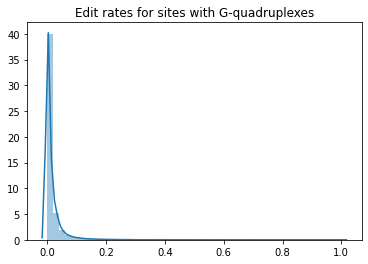

In [16]:
import seaborn as sns
ax = sns.distplot(gquad)
ax = ax.set_title('Edit rates for sites with G-quadruplexes')
ax.get_figure().savefig("{}GQuad.png".format(be))

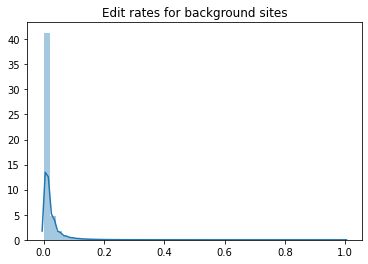

In [17]:
ax = sns.distplot(bkgd)
ax = ax.set_title('Edit rates for background sites')
ax.get_figure().savefig("{}Bkgd.png".format(be))

In [18]:
# Logit transform to better show differences

In [19]:
import math
def logit_transform(x):
    if x < math.exp(-8):
        return -8
    if 1-x < math.exp(-8):
        return 8
    return math.log(x/(1-x))

In [20]:
log_gquad = np.array([logit_transform(x) for x in gquad])
np.mean(log_gquad)

-6.142218133133904

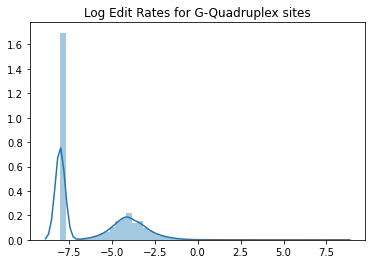

In [23]:
g = sns.distplot(log_gquad)
g = g.set_title('Log Edit Rates for G-Quadruplex sites')
g.get_figure().savefig("{}GQuadLogit.png".format(be))

In [24]:
log_bkgd = np.array([logit_transform(x) for x in bkgd])
np.mean(log_bkgd)

-6.353085940142912

In [ ]:
g = sns.distplot(log_bkgd)
g = g.set_title('Log Edit Rates for Background sites')
g.get_figure().savefig("{}BkgdLogit.png".format(be))